In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
df=pd.read_csv('flights_sample_3m.csv')

In [63]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [16]:
df.tail()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN
2999999,2019-06-15,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2823,LGB,"Long Beach, CA",SJC,"San Jose, CA",...,0.0,70.0,63.0,52.0,324.0,NaN,NaN,NaN,NaN,NaN


In [17]:
df.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,...,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,...,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,...,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,...,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


In [18]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

In [19]:
df.shape

(3000000, 32)

In [53]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE'],
      dtype='object')

In [15]:
print(df['AIRLINE'].value_counts())


AIRLINE
Southwest Airlines Co.                555869
Delta Air Lines Inc.                  388475
American Airlines Inc.                371218
SkyWest Airlines Inc.                 334986
United Air Lines Inc.                 248270
Republic Airline                      138147
Envoy Air                             117312
Endeavor Air Inc.                     109848
JetBlue Airways                       109447
PSA Airlines Inc.                     103483
Alaska Airlines Inc.                   98294
Spirit Air Lines                       93200
Frontier Airlines Inc.                 62711
Mesa Airlines Inc.                     62477
Allegiant Air                          50179
Hawaiian Airlines Inc.                 31698
Horizon Air                            20237
ExpressJet Airlines LLC d/b/a aha!     17951
Name: count, dtype: int64


In [17]:
print(f"Total columns: {len(df.columns)}")

Total columns: 26


In [19]:
cancelled_flights = df[df['CANCELLED'] == 1]
active_flights = df[df['CANCELLED'] == 0]
print(f"Cancelled flights: {len(cancelled_flights)}")
print(f"Missing cancellation codes: {cancelled_flights['CANCELLATION_CODE'].isnull().sum()}")

Cancelled flights: 0


KeyError: 'CANCELLATION_CODE'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913802 entries, 0 to 2999999
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FL_DATE           object 
 1   AIRLINE           object 
 2   AIRLINE_DOT       object 
 3   AIRLINE_CODE      object 
 4   DOT_CODE          int64  
 5   FL_NUMBER         int64  
 6   ORIGIN            object 
 7   ORIGIN_CITY       object 
 8   DEST              object 
 9   DEST_CITY         object 
 10  CRS_DEP_TIME      int64  
 11  DEP_TIME          float64
 12  DEP_DELAY         float64
 13  TAXI_OUT          float64
 14  WHEELS_OFF        float64
 15  WHEELS_ON         float64
 16  TAXI_IN           float64
 17  CRS_ARR_TIME      int64  
 18  ARR_TIME          float64
 19  ARR_DELAY         float64
 20  CANCELLED         float64
 21  DIVERTED          float64
 22  CRS_ELAPSED_TIME  float64
 23  ELAPSED_TIME      float64
 24  AIR_TIME          float64
 25  DISTANCE          float64
dtypes: float64(14), int

In [23]:
columns_to_drop = ['CANCELLATION_CODE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 
                   'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
df = df.drop(columns=columns_to_drop)
df = df.dropna(subset=['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME'])

KeyError: "['CANCELLATION_CODE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'] not found in axis"

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(airline_df['ARR_DELAY'], bins=50, kde=True)
plt.title(f'Arrival Delay Distribution for {top_airline}')
plt.xlabel('Delay in Minutes')
plt.ylabel('Number of Flights')
plt.xlim(-30, 120)
plt.show()

In [26]:
top_routes = airline_df.groupby(['ORIGIN','DEST'])['ARR_DELAY'] \
                     .mean() \
                     .sort_values(ascending=False) \
                     .head(10)

NameError: name 'airline_df' is not defined

In [28]:
plt.figure(figsize=(10,5))
top_routes.plot(kind='barh')
plt.title("Top 10 Most Delayed Routes")
plt.xlabel("Average Delay (minutes)")
plt.show()

NameError: name 'top_routes' is not defined

<Figure size 1000x500 with 0 Axes>

In [30]:
least_delayed_routes = df.groupby(['ORIGIN', 'DEST'])['ARR_DELAY'] \
                                 .mean() \
                                 .sort_values() \
                                 .head(10)

In [32]:
least_delayed_routes

ORIGIN  DEST
BHM     CAE    -54.000000
BOI     JFK    -50.000000
ABQ     SFB    -46.750000
BLI     KOA    -39.000000
SFB     LAS    -37.200000
BOS     PNS    -35.428571
ORD     COD    -34.000000
MTJ     BOS    -34.000000
PHL     MVY    -33.000000
MTJ     LGA    -33.000000
Name: ARR_DELAY, dtype: float64

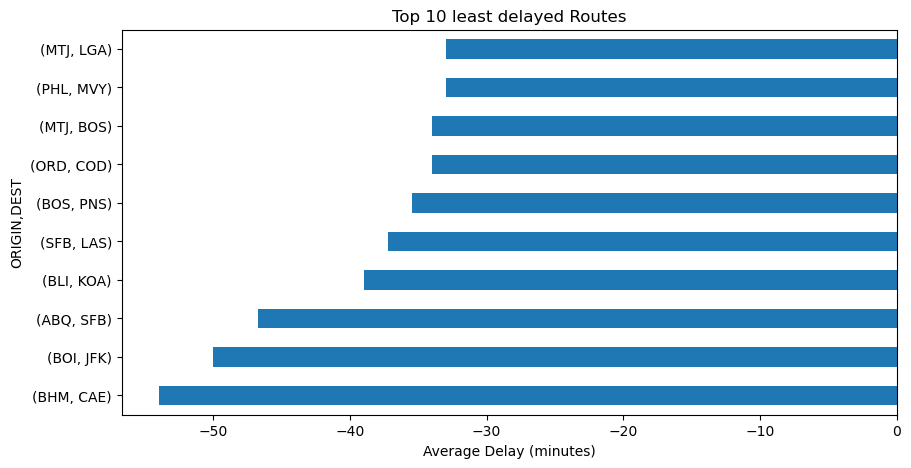

In [34]:
plt.figure(figsize=(10,5))
least_delayed_routes.plot(kind='barh')
plt.title("Top 10 least delayed Routes")
plt.xlabel("Average Delay (minutes)")
plt.show()

In [36]:
avg_dep_delay_by_airline = df.groupby('AIRLINE')['DEP_DELAY'].mean().sort_values(ascending=False)
avg_dep_delay_by_airline

AIRLINE
JetBlue Airways                       18.132905
Frontier Airlines Inc.                15.949929
Allegiant Air                         13.829391
Spirit Air Lines                      12.948777
ExpressJet Airlines LLC d/b/a aha!    12.679182
American Airlines Inc.                12.533756
Mesa Airlines Inc.                    12.152616
United Air Lines Inc.                 11.140118
Southwest Airlines Co.                10.786934
SkyWest Airlines Inc.                  9.401542
Delta Air Lines Inc.                   8.018225
PSA Airlines Inc.                      7.884619
Envoy Air                              6.635340
Endeavor Air Inc.                      5.899006
Republic Airline                       5.680594
Hawaiian Airlines Inc.                 5.075557
Horizon Air                            4.793645
Alaska Airlines Inc.                   4.554195
Name: DEP_DELAY, dtype: float64

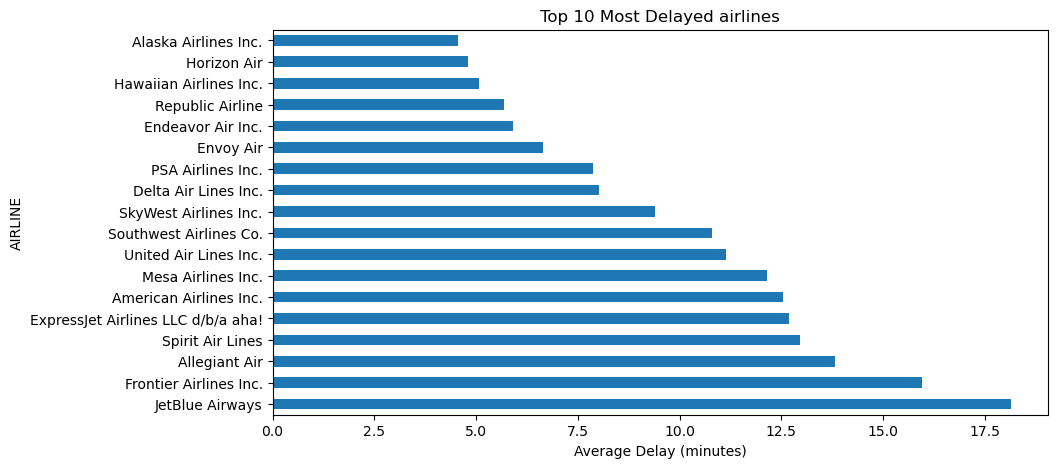

In [38]:
plt.figure(figsize=(10,5))
avg_dep_delay_by_airline.plot(kind='barh')
plt.title("Top 10 Most Delayed airlines")
plt.xlabel("Average Delay (minutes)")
plt.show()

In [40]:
df[['DEP_DELAY', 'ARR_DELAY']].corr()


,DEP_DELAY,ARR_DELAY
DEP_DELAY,1.000000,0.964805
ARR_DELAY,0.964805,1.000000


<Axes: xlabel='DISTANCE', ylabel='ARR_DELAY'>

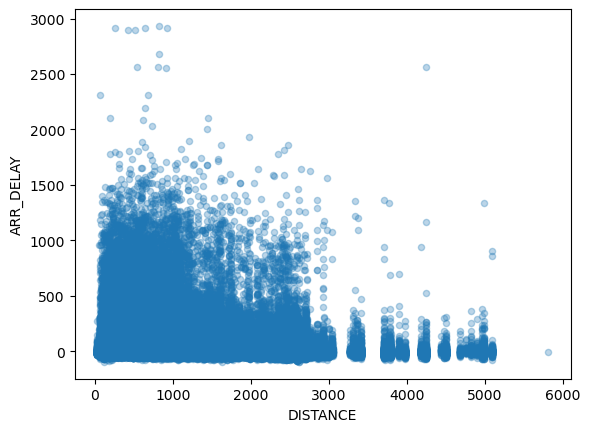

In [42]:
df.plot.scatter(x='DISTANCE', y='ARR_DELAY', alpha=0.3)


In [43]:

df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['DAY_OF_WEEK'] = df['FL_DATE'].dt.dayofweek
df['HOUR_OF_DAY'] = df['CRS_DEP_TIME'] // 100

In [44]:
delay_heatmap = df.pivot_table(index='HOUR_OF_DAY', 
                               columns='DAY_OF_WEEK', 
                               values='DEP_DELAY', 
                               aggfunc=np.mean,
                               fill_value=0)

C:\Users\shiva\AppData\Local\Temp\ipykernel_8256\350174259.py:1: FutureWarning: The provided callable <function mean at 0x00000251799E7740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  delay_heatmap = df.pivot_table(index='HOUR_OF_DAY',


<Axes: xlabel='DAY_OF_WEEK', ylabel='HOUR_OF_DAY'>

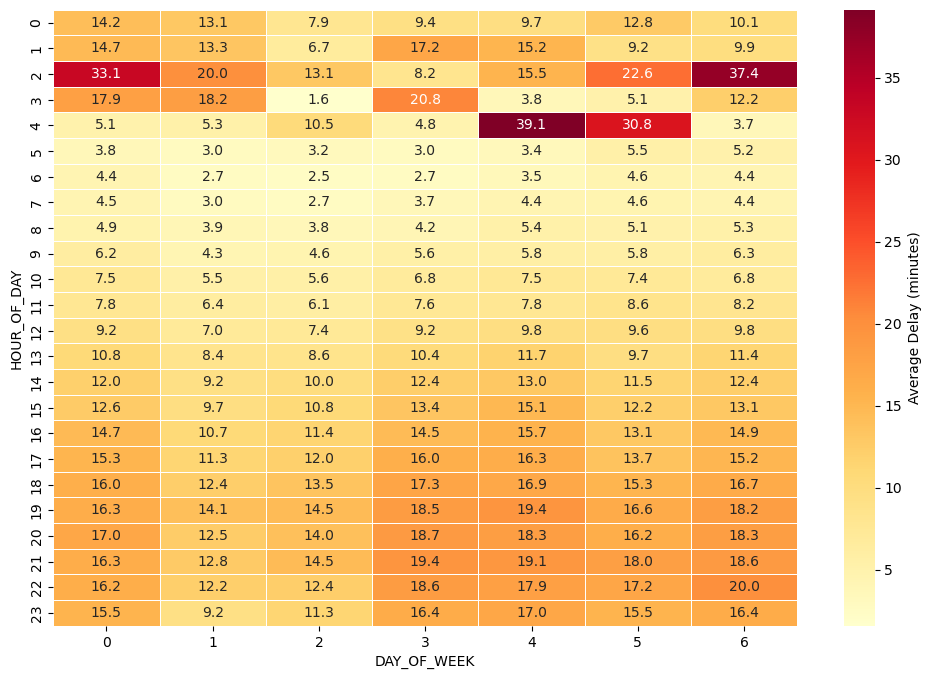

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(delay_heatmap, 
            cmap='YlOrRd',
            annot=True, 
            fmt=".1f",
            linewidths=.5,
            cbar_kws={'label': 'Average Delay (minutes)'})


C:\Users\shiva\AppData\Local\Temp\ipykernel_8256\2883257084.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_delays.values, y=total_delays.index,


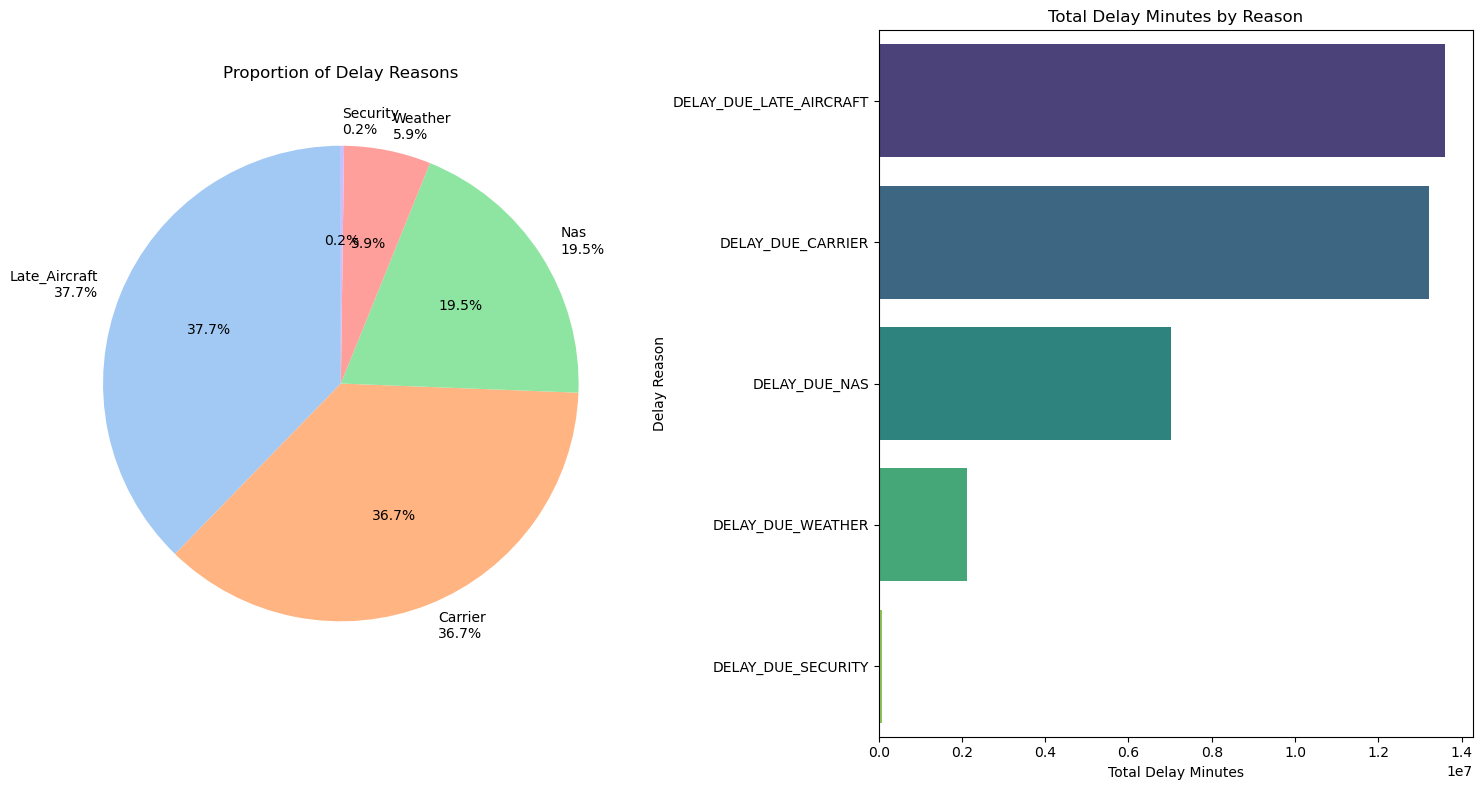


Delay Reason Analysis:
----------------------
Late Aircraft       :   13,598,175 minutes (37.7%)
Carrier             :   13,217,960 minutes (36.7%)
Nas                 :    7,028,161 minutes (19.5%)
Weather             :    2,127,583 minutes (5.9%)
Security            :       77,907 minutes (0.2%)

The primary reason for delays is: Late Aircraft (37.7% of all delays)


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
delay_reasons = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

df_delay = pd.read_csv('flights_sample_3m.csv', usecols=delay_reasons)
total_delays = df_delay[delay_reasons].sum().sort_values(ascending=False)
delay_percentages = (total_delays / total_delays.sum()) * 100


plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.pie(delay_percentages, 
        labels=[f"{label.replace('DELAY_DUE_', '').title()}\n{percent:.1f}%" 
               for label, percent in zip(delay_percentages.index, delay_percentages)],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'))
plt.title('Proportion of Delay Reasons')
plt.subplot(1, 2, 2)
ax = sns.barplot(x=total_delays.values, y=total_delays.index, 
                palette='viridis')
plt.title('Total Delay Minutes by Reason')
plt.xlabel('Total Delay Minutes')
plt.ylabel('Delay Reason')


plt.tight_layout()
plt.show()
print("\nDelay Reason Analysis:")
print("----------------------")
for reason, minutes in total_delays.items():
    clean_name = reason.replace('DELAY_DUE_', '').replace('_', ' ').title()
    print(f"{clean_name:<20}: {minutes:>12,.0f} minutes ({delay_percentages[reason]:.1f}%)")
primary_reason = total_delays.idxmax()
clean_primary = primary_reason.replace('DELAY_DUE_', '').replace('_', ' ').title()
print(f"\nThe primary reason for delays is: {clean_primary} "
      f"({delay_percentages[primary_reason]:.1f}% of all delays)")

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv('flights_sample_3m.csv')  


df = df.dropna(subset=['ARR_DELAY', 'DISTANCE', 'AIR_TIME', 'CRS_ELAPSED_TIME'])


df['Delayed'] = df['ARR_DELAY'].apply(lambda x: 1 if x > 15 else 0)


features = ['DISTANCE', 'AIR_TIME', 'CRS_ELAPSED_TIME']
X = df[features]
y = df['Delayed']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[479719    196]
 [100980   1866]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90    479915
           1       0.90      0.02      0.04    102846

    accuracy                           0.83    582761
   macro avg       0.87      0.51      0.47    582761
weighted avg       0.84      0.83      0.75    582761

Accuracy Score: 0.8263850875401751


In [71]:
import joblib

filename = 'flight_delay_model.pkl'
result = joblib.dump(model, filename)
print("Saved model to:", result)


Saved model to: ['flight_delay_model.pkl']
